In [1]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

In [3]:
def avg_droplets_diam(ARRAY):
    sum_all_drops = 0
    for i in range(ARRAY.shape[0]):
        average_1_drop = (ARRAY[i][2]+ARRAY[i][3])/2
        sum_all_drops = sum_all_drops + average_1_drop
    average_all_drops = sum_all_drops / ARRAY.shape[0]
    return average_all_drops    

In [11]:
Z = "C8F24P442_image1"
ZZ = f"C:\\Users\\Dino\\Desktop\\jupyter scripts for second try\\images for human\\{Z}.jpeg"

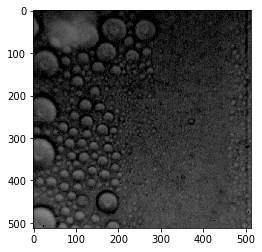

In [12]:
img = cv.imread(ZZ)
plt.imshow(img)
plt.show()

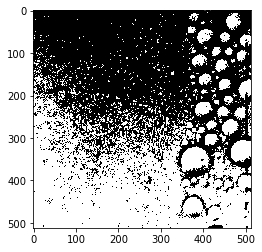

In [6]:
th, img_th = cv.threshold(img, 60, 255, cv.THRESH_BINARY);
plt.imshow(img_th)
plt.show()

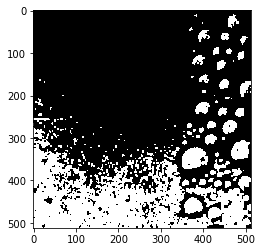

In [7]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv.erode(img_th , kernel, iterations=2)
dilation = cv.dilate(erosion, kernel, iterations=1)
plt.imshow(dilation)
plt.show()

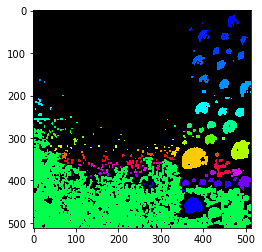

In [8]:
# attention here if you want to run it many times you must always run - the upper line firtst - to renew dilation
dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)
components, nlabels, labels, stats, centroids = CC(dilation)
plt.imshow(components)
plt.show()

In [9]:
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][2] > 150) or (stats[i][2] < 10) or (stats[i][3] > 150) or (stats[i][3] < 10) or (stats[i][2]-stats[i][3]>10) or (stats[i][3]-stats[i][2]>10):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])
FStats = np.array(final_stats, dtype=object)
FCentr = np.array(final_centroids, dtype= int)
#print(FStats)
#print(FCentr)
#print(FCentr[0])

"""
out = img
for row in range(FCentr.shape[0]):
    X = FCentr[row][0]
    Y = FCentr[row][1]
    cv.rectangle(out, (X - 3, Y - 3), (X + 3, Y + 3), (0, 0, 0))
    cv.rectangle(out, (FStats[row][0], FStats[row][1]), (FStats[row][0] + FStats[row][2], FStats[row][1] + FStats[row][3]), (0, 0, 0))

plt.imshow(out)
plt.show()
cv.imwrite("with boxes image.jpeg", out)


"""

'\nout = img\nfor row in range(FCentr.shape[0]):\n    X = FCentr[row][0]\n    Y = FCentr[row][1]\n    cv.rectangle(out, (X - 3, Y - 3), (X + 3, Y + 3), (0, 0, 0))\n    cv.rectangle(out, (FStats[row][0], FStats[row][1]), (FStats[row][0] + FStats[row][2], FStats[row][1] + FStats[row][3]), (0, 0, 0))\n\nplt.imshow(out)\nplt.show()\ncv.imwrite("with boxes image.jpeg", out)\n\n\n'

In [10]:
print("Number of droplets on this frame is:             ", FStats.shape[0])
print("Average Diameter of droplets on this frame is:   ", round(avg_droplets_diam(FStats), 2))


Number of droplets on this frame is:              45
Average Diameter of droplets on this frame is:    20.09


THIS IS ALL IN ONE CELL

In [21]:
Z = "C9F24P452_image3"
ZZ = f"C:\\Users\\Dino\\Desktop\\jupyter scripts for second try\\images for human\\{Z}.jpeg"
img = cv.imread(ZZ)
th, img_th = cv.threshold(img, 60, 255, cv.THRESH_BINARY);
kernel = np.ones((3, 3), np.uint8)
erosion = cv.erode(img_th , kernel, iterations=2)
dilation = cv.dilate(erosion, kernel, iterations=1)
dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)
components, nlabels, labels, stats, centroids = CC(dilation)
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][2] > 150) or (stats[i][2] < 10) or (stats[i][3] > 150) or (stats[i][3] < 10) or (stats[i][2]-stats[i][3]>10) or (stats[i][3]-stats[i][2]>10):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])
FStats = np.array(final_stats, dtype=object)
FCentr = np.array(final_centroids, dtype= int)
print("Number of droplets on this frame is:             ", FStats.shape[0])
print("Average Diameter of droplets on this frame is:   ", round(avg_droplets_diam(FStats), 2))


Number of droplets on this frame is:              122
Average Diameter of droplets on this frame is:    19.62
